### Q2: How does coffee consumption affect productivity (measured by GDP)? 
 The methodology involved loading useful packages like matplotlib, pandas, folium, statsmodels.  We then  cleaned  the datasets ​​"coffee.csv" and "Productivity.csv” by only choosing selected countries. We only took  data from 2012 to 2021 in ​​"coffee.csv" and separated the data into two parts for later analysis. We split that dataset into coffee_revenue and coffee_volume. We then went with the “Productivity.csv”dataset and decided to only analyze 12 countries to reduce complex data processing. We dropped  all the countries which weren't our target in our dataset and dropped all columns and rows  which weren't useful relative to this project. We then converted the data from object to float and calculated the average coffee volume and revenue for each country  and also calculated average productivity for each country. For the next step, we got  the world country data and created dictionaries about 12 countries' locations and changed the  name United States to the United States of America because country_shapes and coffee_volume name U.S. are different . We used folium to create popup maps of average coffee volume, average revenue and average productivity. We then created a new dataframe using country name as key and data from 2012 to 2021 as value and combined them all into one list. After that, we plotted histograms counting each country's GDP, coffee_volume, and coffee_revenue using seaborn package and predicted the coffee and GDP relationship using regressions by package statsmodels. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
coffee = pd.read_csv("coffee.csv")#the dataset about coffee volume and revenue

In [3]:
#we only take data from 2012 to 2021, and the countries
coffee = coffee.drop(columns=["Market","Name","Source","2022","2023","2024","2025"])

In [4]:
#seperate the data into two parts for later analysis
revenue = []
for i in range(len(coffee["Chart"])):
    if coffee["Chart"][i] == "Revenue":
        revenue.append(coffee.loc[i])
#Make all the data marked “Revenue” into a DataFrame
coffee_revenue = pd.DataFrame(revenue)

In [5]:
volume = []
for i in range(len(coffee["Chart"])):
    if coffee["Chart"][i] == "Volume":
        volume.append(coffee.loc[i])
#Make all the data marked “Volume” into a DataFrame
coffee_volume = pd.DataFrame(volume)

In [6]:
coffee_revenue.head()

,Region,Chart,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Brazil,Revenue,billion USD (US$),36.33,36.88,37.62,30.23,32.91,39.46,37.31,38.09,25.64,30.53
1,Vietnam,Revenue,billion USD (US$),2.242,2.84,3.452,3.93,4.462,4.819,5.134,5.44,4.741,5.547
2,Colombia,Revenue,billion USD (US$),1.86,2.417,2.436,1.929,1.947,2.212,2.377,2.304,1.833,2.171
3,Indonesia,Revenue,billion USD (US$),3.813,4.312,4.592,4.716,5.375,6.31,7.025,8.291,7.371,9.532
4,Ethiopia,Revenue,billion USD (US$),1.035,0.931,0.853,0.882,0.899,0.907,0.872,0.904,0.691,0.666


In [7]:
coffee_volume

,Region,Chart,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
5,Brazil,Volume,million kilograms,962.546,973.093,979.022,990.806,"1,011.70","1,038.23","1,054.69","1,094.98","1,083.78","1,151.44"
6,Vietnam,Volume,million kilograms,64.856,76.07,86.833,97.655,108.562,117.083,122.948,128.024,125.943,134.478
7,Colombia,Volume,million kilograms,43.329,57.615,60.835,63.097,65.502,67.984,70.434,72.855,72.77,76.063
8,Indonesia,Volume,million kilograms,84.32,96.754,106.984,113.668,120.212,132.492,147.413,163.227,163.543,179.324
9,Ethiopia,Volume,million kilograms,48.096,44.227,41.971,43.596,45.221,46.941,48.472,50.222,49.109,52.609
15,Honduras,Volume,million kilograms,20.571,18.289,18.734,20.19,21.46,22.56,23.508,24.368,23.511,25.11
16,United States,Volume,million kilograms,"1,027.94","1,042.51","1,063.58","1,089.01","1,114.66","1,144.85","1,196.01","1,224.27","1,155.59","1,221.16"
17,Germany,Volume,million kilograms,487.278,479.924,471.362,466.227,464.752,465.626,475.678,472.888,438.643,449.59
18,Japan,Volume,million kilograms,212.794,221.872,231.582,239.653,246.026,251.275,257.026,260.664,252.574,261.502
19,France,Volume,million kilograms,284.35,291.634,293.711,287.09,275.801,261.999,240.315,236.789,224.371,226.331


In [8]:
Productivity=pd.read_csv("Productivity.csv", skiprows=4)#the dataset about each country's productivity 

In [9]:
#We will only analyze 12 countries to reduce complex data processing
countries = ["Brazil" , "Vietnam", "Colombia" , "Indonesia" , "Ethiopia", "Honduras", "United States" , "Germany", "Japan", "France", "Italy", "Russian Federation" ]

In [10]:
#Drop all countries which aren't our target in our dataset
for i in range (len(Productivity["Country Name"])) :
    country = Productivity["Country Name"][i]
    if country not in countries:
        Productivity = Productivity.drop([i])

In [11]:
#Drop all columns which aren't useful relative to this project
Productivity=Productivity.drop(columns=["Country Code","Indicator Name", "Indicator Code", "Unnamed: 66"], axis=1)

In [12]:
#Drop all rows which aren't useful relative to this project
Productivity=Productivity.drop(Productivity.iloc[:, 1:50], axis=1)
#in order to keep same data amount with coffee, we will only retain the years from 2012 to 2021
Productivity=Productivity.drop(columns=["2009","2010","2011"])

In [13]:
Productivity.head()

,Country Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
29,Brazil,2.465228e+12,2.472819e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.873288e+12,1.448566e+12,1.608981e+12
45,Colombia,3.709213e+11,3.821161e+11,3.811121e+11,2.934817e+11,2.828250e+11,3.118837e+11,3.341982e+11,3.231095e+11,2.703000e+11,3.143225e+11
55,Germany,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,3.977289e+12,3.888327e+12,3.846414e+12,4.223116e+12
72,Ethiopia,4.331072e+10,4.764821e+10,5.561223e+10,6.458933e+10,7.429662e+10,8.177079e+10,8.426935e+10,9.591259e+10,1.076577e+11,1.112711e+11
77,France,2.683672e+12,2.811877e+12,2.855964e+12,2.439189e+12,2.472964e+12,2.595151e+12,2.790957e+12,2.728870e+12,2.630318e+12,2.937473e+12


In [14]:
import re
test = coffee_volume.drop(columns=["Region","Chart","Unit"])
for i in test.keys():
    a = coffee_volume[i][16]
    b = coffee_volume[i][5]
    #remove all comma from America and Brazil rows
    coffee_volume[i][16]=re.sub("[^\d\.]", "", a)
    coffee_volume[i][5]=re.sub("[^\d\.]", "", b)
    #then convert the data from object to float 
    coffee_revenue[i]=pd.to_numeric(coffee_revenue[i])
    coffee_volume[i]=pd.to_numeric(coffee_volume[i])

<ipython-input-14-a1238211d07c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_volume[i][16]=re.sub("[^\d\.]", "", a)
<ipython-input-14-a1238211d07c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_volume[i][5]=re.sub("[^\d\.]", "", b)


In [15]:
test1 = coffee_volume.drop(columns=["Region","Chart","Unit"])#coffee_volume with only numbers from 2012 to 2021
test2 = coffee_revenue.drop(columns=["Region","Chart","Unit"])#coffee_revenue with only numbers from 2012 to 2021
total_volume = []
total_revenue = []
#calculate the average coffee volum and revenue for each country 
for i in test1.index:
    total_volume.append(sum(test1.loc[i])/10)
for i in test2.index:
    total_revenue.append(sum(test2.loc[i]/10))
#add new column "average" into coffee_volume and coffee_revenue dataframe
coffee_volume["average"]=total_volume
coffee_revenue["average"]=total_revenue

test3 = Productivity.drop(columns=["Country Name"])#productivity with only numbers from 2012 to 2021
total_productivity = []
#calculate the average productivity for each country 
for i in test3.index:
    total_productivity.append((sum(test3.loc[i]/12))/10**9)
#add new column "average" into productivity dataframe
Productivity["average"]=total_productivity

In [16]:
#get the world country data
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
import folium
#create dict about 12 countries location
country = {"name":["United States","Brazil","Colombia","Germany","Ethiopia","France","Honduras","Indonesia","Italy","Japan","Russia","Vietnam"],
           "latitude":[37.09024,-14.235004,4.570868,51.165691,9.145,46.227638,15.199999,-0.789275,41.87194,36.204824,61.52401,14.058324],
           "longitude":[-95.712891,-51.92528,-74.297333,10.451526,40.489673,2.213749,-86.241905,113.921327,12.56738,138.252924,105.318756,108.277199]}

In [18]:
#change name United States as United States of America(beause country_shapes and coffee_volume name U.S. different )
coffee_volume.replace('United States', "United States of America", inplace = True)
p = folium.Map(location=[28.0290, 1.6667],zoom_start=2)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='coffee volume',
    data=coffee_volume,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=["Region", "average"],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white',
    legend_name="Average Coffee Volume (million kilograms)"
    
).add_to(p)

In [19]:
for lat, lon, name in   zip(country['latitude'],country['longitude'],country['name']):
    #Creating the marker
    folium.Marker(
    #Coordinate of the country
    location=[lat, lon],
    #The popup that show up if click the marker
    popup=name
  ).add_to(p)
p

In [20]:
q = folium.Map(location=[28.0290, 1.6667],zoom_start=2.4)
#change name United States as United States of America(beause country_shapes and coffee_revenue name U.S. different )
coffee_revenue.replace('United States', "United States of America", inplace = True)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='coffee revenue',
    data=coffee_revenue,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=["Region", "average"],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white',
    legend_name="Average Revenue (billion USD)",
    
).add_to(q)


In [21]:
for lat, lon, name in   zip(country['latitude'],country['longitude'],country['name']):
    #Creating the marker
    folium.Marker(
    #Coordinate of the country
    location=[lat, lon],
    #The popup that show up if click the marker
    popup=name
    ).add_to(q)

q

In [22]:
d = folium.Map(location=[28.0290, 1.6667],zoom_start=2)
#change name United States as United States of America
Productivity.replace('United States', "United States of America", inplace = True)
#change name Russia as Russian Federation
Productivity.replace('Russian Federation', "Russia", inplace = True)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='productivity',
    data=Productivity,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=["Country Name", "average"],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white',
    legend_name="Average Productivity(billion dollar)",
    
).add_to(d)

In [23]:
for lat, lon, name in   zip(country['latitude'],country['longitude'],country['name']):
    #Creating the marker
    folium.Marker(
    #Coordinate of the country
   location=[lat, lon],
    #The popup that show up if click the marker
    popup=name
  ).add_to(d)
d

In [24]:
revenue_country = {} #revise from coffee_revenue
#a new dataframe use country name as key and data from 2012 to 2021 as value
for x in test2.index:
    w = []
    for y in test2.keys():
        w.append(test2[y][x])
    revenue_country[coffee_revenue["Region"][x]]=w
revenue_country = pd.DataFrame(revenue_country)
revenue_country.head()

,Brazil,Vietnam,Colombia,Indonesia,Ethiopia,Honduras,United States of America,Germany,Japan,France,Italy,Russia
0,36.33,2.242,1.860,3.813,1.035,0.770,57.35,22.02,40.15,13.56,11.57,3.399
1,36.88,2.840,2.417,4.312,0.931,0.677,60.16,23.00,34.11,15.90,12.12,3.722
2,37.62,3.452,2.436,4.592,0.853,0.717,63.33,23.04,33.36,16.49,12.31,3.341
3,30.23,3.930,1.929,4.716,0.882,0.773,66.48,19.84,30.71,13.61,10.37,2.364
4,32.91,4.462,1.947,5.375,0.899,0.810,70.08,20.19,35.48,13.51,10.82,2.459


In [25]:
coffee_country = {}#revise from coffee_volume
#a new dataframe use country name as key and data from 2012 to 2021 as value
for x in test1.index:
    w = []
    for y in test1.keys():
        w.append(test1[y][x])
    coffee_country[coffee_volume["Region"][x]]=w
coffee_country = pd.DataFrame(coffee_country)
coffee_country.head()

,Brazil,Vietnam,Colombia,Indonesia,Ethiopia,Honduras,United States of America,Germany,Japan,France,Italy,Russia
0,962.546,64.856,43.329,84.320,48.096,20.571,1027.94,487.278,212.794,284.350,279.071,103.677
1,973.093,76.070,57.615,96.754,44.227,18.289,1042.51,479.924,221.872,291.634,279.583,106.805
2,979.022,86.833,60.835,106.984,41.971,18.734,1063.58,471.362,231.582,293.711,281.548,110.070
3,990.806,97.655,63.097,113.668,43.596,20.190,1089.01,466.227,239.653,287.090,284.997,113.223
4,1011.700,108.562,65.502,120.212,45.221,21.460,1114.66,464.752,246.026,275.801,289.069,116.968


In [26]:
GDP_country = {}#revise from productivity
#a new dataframe use country name as key and data from 2012 to 2021 as value
for x in test3.index:
    w = []
    for y in test3.keys():
        w.append(test3[y][x])
    GDP_country[Productivity["Country Name"][x]]=w
GDP_country = pd.DataFrame(GDP_country)
GDP_country.head()

,Brazil,Colombia,Germany,Ethiopia,France,Honduras,Indonesia,Italy,Japan,Russia,United States of America,Vietnam
0,2.465228e+12,3.709213e+11,3.527143e+12,4.331072e+10,2.683672e+12,1.852860e+10,9.178699e+11,2.086958e+12,6.272363e+12,2.208296e+12,1.625397e+13,1.955925e+11
1,2.472819e+12,3.821161e+11,3.733805e+12,4.764821e+10,2.811877e+12,1.849971e+10,9.125241e+11,2.141924e+12,5.212328e+12,2.292473e+12,1.684319e+13,2.137109e+11
2,2.456044e+12,3.811121e+11,3.889093e+12,5.561223e+10,2.855964e+12,1.975649e+10,8.908148e+11,2.162010e+12,4.896994e+12,2.059242e+12,1.755068e+13,2.334500e+11
3,1.802212e+12,2.934817e+11,3.357586e+12,6.458933e+10,2.439189e+12,2.097977e+10,8.608542e+11,1.836638e+12,4.444931e+12,1.363481e+12,1.820602e+13,2.392572e+11
4,1.795693e+12,2.828250e+11,3.469853e+12,7.429662e+10,2.472964e+12,2.171762e+10,9.318774e+11,1.877072e+12,5.003678e+12,1.276787e+12,1.869511e+13,2.570960e+11


In [27]:
import seaborn as sns
country = []
volume = []
revenue = []
GDP = []
#combine all countries data from 2012 to 2021 into one list 
for i in range(10):
    for j in coffee_country.keys():
        country.append(j)
        volume.append(coffee_country[j][i])
        revenue.append(revenue_country[j][i])
        GDP.append(GDP_country[j][i])
# a new dataframe with combined result 
coffee = {"country":country,"coffee_volume":volume,"coffee_revenue":revenue,"GDP":GDP}
coffee = pd.DataFrame(coffee)
coffee.head()

,country,coffee_volume,coffee_revenue,GDP
0,Brazil,962.546,36.330,2.465228e+12
1,Vietnam,64.856,2.242,1.955925e+11
2,Colombia,43.329,1.860,3.709213e+11
3,Indonesia,84.320,3.813,9.178699e+11
4,Ethiopia,48.096,1.035,4.331072e+10


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use eithe

<AxesSubplot:xlabel='coffee_volume', ylabel='Count'>

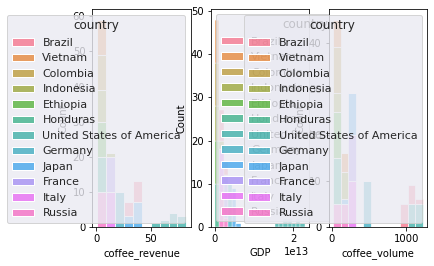

In [28]:
# histogram counting each country GDP, coffee_volume, and coffee_revenue
fig, axes = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(16,6)})
sns.histplot(data=coffee,x="coffee_revenue",hue="country",multiple="stack",ax=axes[0])
sns.histplot(data=coffee,x="GDP",hue="country",multiple="stack",ax=axes[1])
sns.histplot(data=coffee,x="coffee_volume",hue="country",multiple="stack",ax=axes[2])


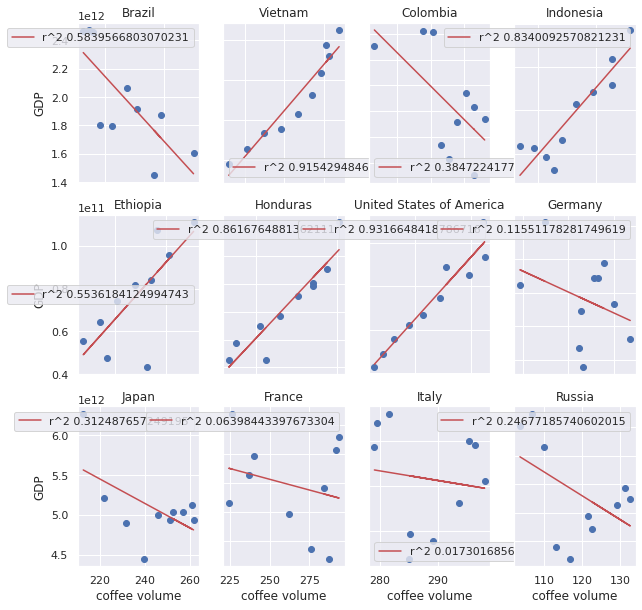

In [35]:
fig, axs = plt.subplots(3, 4,figsize=(10, 10))
plot_x = []#the x axs of each graph 
plot_y = []#the y axs of each graph
for i in range(3):
    for j in range(4):
        plot_x.append(i)
        plot_y.append(j)
#put x axs, y axs, and country name into one dataframe
graph = {0:plot_x,1:plot_y,2:coffee_volume["Region"]}
graph = pd.DataFrame(graph)
for i in graph.index:
    #12 graphs about each country's GDP vs coffee volume
    axs[graph[0][i],graph[1][i]].scatter(coffee_country[graph[2][i]],GDP_country[graph[2][i]])
    import statsmodels.api as sm
    constant = sm.add_constant(coffee_country[graph[2][i]])
    model = sm.OLS(GDP_country[graph[2][i]],constant)
    result = model.fit()
    #regressions of 12 countries with relationship between GDP and coffee_volume
    axs[graph[0][i],graph[1][i]].plot(coffee_country[graph[2][i]],result.predict(),c="r",label="r^2 "+str(result.rsquared))
    axs[graph[0][i],graph[1][i]].set_title(graph[2][i])
    axs[graph[0][i],graph[1][i]].set_xlabel("coffee volume")
    axs[graph[0][i],graph[1][i]].set_ylabel("GDP")
    axs[graph[0][i],graph[1][i]].legend()
for ax in axs.flat:
    ax.label_outer()

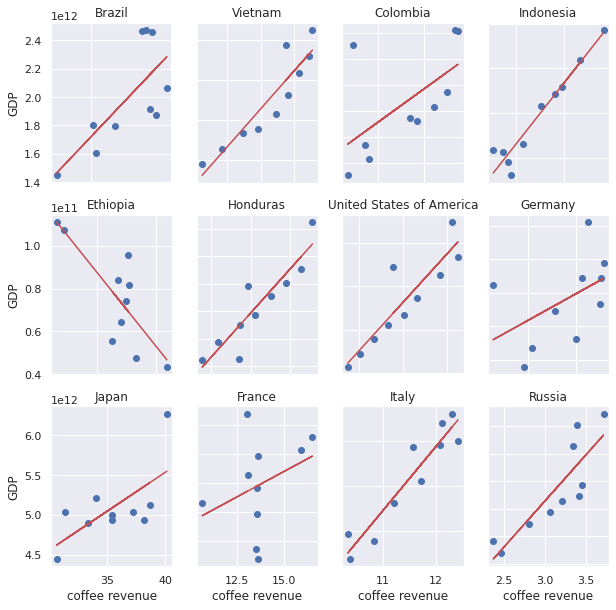

In [33]:
fig, axs = plt.subplots(3, 4,figsize=(10, 10))
plot_x = []#the x axs of each graph 
plot_y = []#the y axs of each graph 
for i in range(3):
    for j in range(4):
        plot_x.append(i)
        plot_y.append(j)
graph = {0:plot_x,1:plot_y,2:coffee_revenue["Region"]}
graph = pd.DataFrame(graph)
for i in graph.index:
    #12 graphs about each country's GDP vs coffee revenue
    axs[graph[0][i],graph[1][i]].scatter(revenue_country[graph[2][i]],GDP_country[graph[2][i]])
    import statsmodels.api as sm
    constant = sm.add_constant(revenue_country[graph[2][i]])
    model = sm.OLS(GDP_country[graph[2][i]],constant)
    result = model.fit()
    #regressions of 12 countries with relationship between GDP and coffee_revenue
    axs[graph[0][i],graph[1][i]].plot(revenue_country[graph[2][i]],result.predict(),c="r")
    axs[graph[0][i],graph[1][i]].set_title(graph[2][i])
    axs[graph[0][i],graph[1][i]].set_xlabel("coffee revenue")
    axs[graph[0][i],graph[1][i]].set_ylabel("GDP")


for ax in axs.flat:
    ax.label_outer()

### Conclusion:

-We can see that in most countries like Brazil, Vietnam, Columbia, Indonesia, Honduras, United States, Germany, Japan, France, Italy and Russia; the slope is positive which means GDP and coffee revenue are positively related. In this case, as coffee revenue increases, the GDP is also increasing.\
-Ethiopia is the only country with a negative slope, with GDP drastically decreasing with increase in coffee revenue.\
-From the histograms, we can observe that most countries that have higher coffee volume and coffee revenue also have higher GDP.\
-In the popup maps, the US has the highest GDP, average revenue and coffee volume whereas Brazil also has very high coffee volume but it doesn't have the highest GDP and coffee revenue. Japan, Germany and France have the second highest coffee volume, but only Japan and Germany have the second highest GDP and only Japan has second highest coffee revenue. The other countries have pretty low coffee revenue, coffee volume and also low GDP.



In [31]:
c = 1324343032.324325235

In [40]:
round(c,2)

0.25

In [39]:
c = result.rsquared
c

0.24677185740602015